# Diseño y Análisis de Algoritmos INF413

Los programas resuelven problemas, pero existen muchas formas de resolver un problema. Cómo saber cuándo un programa es mejor que otro?

El análisis de algoritmos es la manera de determinar los requerimientos de tiempo y espacio requeridos por un programa.

La notación O Grande o $\mathcal{O}(f(n))$ se utliza para definir una cota superior del comportamiento asintótico del crecimiento del tiempo de ejecución de un programa.

In [1]:
from platform import python_version

print(python_version())

import time

help(time.time)

3.7.13
Help on built-in function time in module time:

time(...)
    time() -> floating point number
    
    Return the current time in seconds since the Epoch.
    Fractions of a second may be present if the system clock provides them.



In [92]:
import math


def isPrime(num):
  if num < 2:
    return False
  for i in range(2, int(math.sqrt(num)) + 1):
    if num % i == 0:
      return False
  return True

def SieveOfEratosthenes(n):
    n=np.int64(n)
    prime = [True for i in range(n + 1)]
    p = 2
    while (p * p <= n):
        if (prime[p] == True):  
            for i in range(p ** 2, n + 1, p):
                prime[i] = False
        p += 1
    prime[0]= False
    prime[1]= False
    for i,p in enumerate(prime):
      if i==n and p:
        return True
    return False
    

In [85]:
isPrime(1e16)

False

In [91]:
SieveOfEratosthenes(1e2)

TypeError: ignored

# Costo Lineal

El costo constante se refiere al caso cuando el algoritmo tiene costo lineal al tamaño del problema $\mathcal{O}(n)$

In [11]:
import time
import numpy as np


time_data={'method':list(),'ellapsed_time':list(),'problem_size':list()}
problems={1,1e2,1e6,1e8,1e12}
methods=['isPrime','SieveOfEratosthenes']
sample_size=1000
for m in methods:
  for p in problems:
    for i in range(sample_size):
      a=np.random.randint(p)
      t1=time.time()
      eval(m)(a)
      ellapsed_time=time.time()-t1
      time_data['problem_size'].append(p)
      time_data['method'].append(m)
      time_data['ellapsed_time'].append(ellapsed_time)

In [12]:
import pandas as pd

df=pd.DataFrame(time_data,columns=time_data.keys())

In [15]:
df['problem_size']=df['problem_size'].astype('int64')

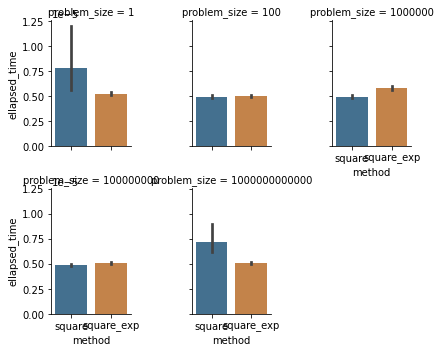

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.catplot(x="method", y="ellapsed_time", col="problem_size",data=df, saturation=.5,
                kind="bar", col_wrap=3, height=2.5, aspect=.8)

Primero comprobamos que para un mismo tamaño de entrada, ambos metodos entregan resultados diferentes de tiempo de ejecucion

In [22]:
from scipy import stats

# Student’s t-test
# Tests whether the means of two independent samples are significantly different.

for n in sorted(problems):
    pvalue=stats.ttest_ind(df.loc[(df['method'] == 'square') & (df['problem_size'] ==n)]['ellapsed_time'],
                           df.loc[(df['method'] == 'square_exp') & (df['problem_size'] ==n)]['ellapsed_time'])[1]
    print('n={0}, valor-p : {1:06.8f}'.format(n,pvalue))
    if pvalue > 0.05:
        print('Datos provienen de la misma distribucion')
    else:
        print('Datos provienen de distribuciones diferentes')
    print('----------------------------------------')

n=1, valor-p : 0.18817604
Datos provienen de la misma distribucion
----------------------------------------
n=100.0, valor-p : 0.59558349
Datos provienen de la misma distribucion
----------------------------------------
n=1000000.0, valor-p : 0.00000000
Datos provienen de distribuciones diferentes
----------------------------------------
n=100000000.0, valor-p : 0.04103374
Datos provienen de distribuciones diferentes
----------------------------------------
n=1000000000000.0, valor-p : 0.01827620
Datos provienen de distribuciones diferentes
----------------------------------------


Ahora, para un mismo metodo comprobamnos que tiene costo constante

In [36]:
n1=np.int64(1e2)
n2=np.int64(1e8)
pvalue=stats.ttest_ind(df.loc[(df['method'] == 'square') & (df['problem_size'] ==n1)]['ellapsed_time'],
                           df.loc[(df['method'] == 'square') & (df['problem_size'] ==n2)]['ellapsed_time'])[1]
print('n1={0},n2={1} valor-p : {2:06.8f}'.format(n1,n2,pvalue))
if pvalue > 0.05:
  print('Datos provienen de la misma distribucion')
else:
  print('Datos provienen de distribuciones diferentes')

n1=100,n2=100000000 valor-p : 0.56981597
Datos provienen de la misma distribucion


Una consideracion importante al comparar poblaciones es el tamaño muestreal. En poblaciones pequeñas, no es posible determinar variaciones en sus medias o varianzas.

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

# problema con tama~{n}os de muestra peque~{n}os!

samples=5
data1 = np.random.normal(1,1,samples)
data2 = np.random.normal(0,1,samples)
stat, p = ttest_ind(data1, data2)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Datos provienen de la misma distribucion')
else:
    print('Datos provienen de distribuciones diferentes')

stat=1.269, p=0.240
Datos provienen de la misma distribucion


# Costo Lineal

El costo lineal se refiere al caso cuando el algoritmo tiene costo lineal con respecto al tamaño del problema $\mathcal{O}(n)$

In [ ]:
def cumsum(n):
    j=0
    for i in range(int(n)):
        j=j+i
    return j

print('La suma acumulativa de 10 es : %5d'%cumsum(10))
print('La suma acumulativa de 1000 es : %5d'%cumsum(1e3))

La suma acumulativa de 10 es :    45
La suma acumulativa de 1000 es : 499500


In [ ]:
import numpy as np

print('La suma acumulativa de 10 es : %5d'%np.cumsum(np.arange(10))[-1])
print('La suma acumulativa de 1000 es : %5d'%np.cumsum(np.arange(1e3))[-1])

La suma acumulativa de 10 es :    45
La suma acumulativa de 1000 es : 499500


# Tarea

En este laboratorio Ud debe completar las siguientes tareas:

    1.) Comparar dos implementaciones distintas para una funcion de costo lineal.
    2.) Reportar los tiempos de ejecucion para distintos tamaños de problema.
    3.) Evaluar los valores-p para cada tamaño de problema e implementación.

https://stackoverflow.com/questions/20458132/recursive-cumulative-sum